In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from scraping import *

In [2]:
# get MLB teams
mlb_teams = get_mlb_teams()
mlb_teams

,team,team_id
0,Los Angeles Angels,108
1,Arizona Diamondbacks,109
2,Baltimore Orioles,110
3,Boston Red Sox,111
4,Chicago Cubs,112
5,Cincinnati Reds,113
6,Cleveland Guardians,114
7,Colorado Rockies,115
8,Detroit Tigers,116
9,Houston Astros,117


In [161]:
players = get_players_by_league(mlb_teams)
position_players = players[(players['position'] != 'P')]
position_players_active = players[(players['status'] == 'A') & (players['position'] != 'P')]
pitchers = players[(players['position'] == 'P')]
pitchers_active = players[(players['status'] == 'A') & (players['position'] == 'P')]

# Generate Stats

In [9]:
# to generate data frame
# position_players_list = []
years = [2021, 2022, 2014, 2013]
for year in years:
    position_players_list.append(create_position_player_stats(position_players.id, year, minors = True)[0])
position_minors_stats = pd.concat(position_players_list)

In [151]:
pitcher_war = pd.read_csv('pitcher_war.csv')
missing_pitchers = [i for i in pitcher_war.Name if i not in pitchers_active["player"].to_list()]
missing_pitchers = pitchers[pitchers.player.isin(missing_pitchers)].id.to_list()
# pitchers_list = []
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for year in years:
    pitchers_list.append(create_pitcher_stats(missing_pitchers, year, minors = True)[0])
pitchers_minors_stats = pd.concat(pitchers_list)

In [155]:
temp = pd.read_csv("pitchers_minors.csv")
pd.concat([temp, pitchers_minors_stats]).sort_values(["name", "gameDate"]).to_csv("pitchers_minors.csv", index = False)

In [163]:
position_war = pd.read_csv('position_war.csv')
missing_position = [i for i in position_war.Name if i not in position_players_active["player"].to_list()]
missing_position = position_players[position_players.player.isin(missing_position)].id.to_list()
position_players_list = []
years = [2013]
for year in years:
    position_players_list.append(create_position_player_stats(missing_position, year)[0])
position_majors_stats = pd.concat(position_players_list)

In [166]:
position_war = pd.read_csv('position_war.csv')
missing_position = [i for i in position_war.Name if i not in position_players_active["player"].to_list()]
missing_position = position_players[position_players.player.isin(missing_position)].id.to_list()
# position_players_list = []
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for year in years:
    position_players_list.append(create_position_player_stats(missing_position, year)[0])
position_majors_stats = pd.concat(position_players_list)
temp = pd.read_csv("position_majors.csv")
pd.concat([temp, position_majors_stats]).sort_values(["name", "gameDate"]).to_csv("position_majors.csv", index = False)

position_players_list = []
for year in years:
    position_players_list.append(create_position_player_stats(missing_position, year, minors= True)[0])
position_minors_stats = pd.concat(position_players_list)
temp = pd.read_csv("position_minors.csv")
pd.concat([temp, position_minors_stats]).sort_values(["name", "gameDate"]).to_csv("position_minors.csv", index = False)

In [ ]:
position_players_list = []
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for year in years:
    position_players_list.append(create_position_player_stats(missing_position.id, year, minors=True)[0])
position_minors_stats = pd.concat(position_players_list)

In [22]:
position_majors_stats.to_csv('position_majors.csv', index=False)

In [23]:
# position_minors_stats = pd.read_csv('2022_position_players.csv')
position_minors_stats.sort_values(["name", "gameDate"]).to_csv("position_minors.csv", index=False)

In [14]:
pitchers_list = []
years = [2020, 2021]
for year in years:
    pitchers_list.append(create_pitcher_stats(pitchers.id, year, minors = True)[0])
pitchers_minors_stats = pd.concat(pitchers_list)

In [6]:
# pitchers_list = []
years = [2013, 2014, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for year in years:
    pitchers_list.append(create_pitcher_stats(pitchers.id, year)[0])
pitchers_majors_stats = pd.concat(pitchers_list)

In [10]:
pitchers_majors_stats.sort_values(["name", "gameDate"]).to_csv("pitchers_majors.csv", index=False)

In [16]:
pitchers_minors_stats.to_csv("pitchers_minors.csv")

In [101]:
players[(players['player'] == 'Josh Hader')]

,player,id,position,status
877,Josh Hader,623352,P,TR


# Days Missed Experimentation

In [13]:
position_minors_stats["gameDate"] = pd.to_datetime(position_minors_stats["gameDate"])
position_minors_stats['season'] = pd.DatetimeIndex(position_minors_stats['gameDate']).year
position_minors_stats["days_between_game"] = position_minors_stats.groupby(["name", "season"])["gameDate"].transform(lambda X: X.diff())
position_minors_stats["days_between_game"] = position_minors_stats["days_between_game"].apply(lambda x: x.days)
position_minors_stats

,Unnamed: 0,name,gameDate,gameID,team,opponent,hits,atBats,homeRuns,runs,rbi,stolenBases,strikeOuts,walks,avg,obp,slg,ops,season,days_between_game
0,0,David Fletcher,2015-06-18,427733,Orem Owlz,Ogden Raptors,1,3,0,0,1,0,0,1,0.333,0.500,0.333,0.833,2015,NaN
1,1,David Fletcher,2015-06-19,427734,Orem Owlz,Ogden Raptors,1,5,0,0,1,0,0,0,0.250,0.333,0.250,0.583,2015,1.0
2,2,David Fletcher,2015-06-20,427771,Orem Owlz,Ogden Raptors,1,4,0,0,1,0,0,1,0.250,0.357,0.250,0.607,2015,1.0
3,3,David Fletcher,2015-06-21,427772,Orem Owlz,Ogden Raptors,1,4,0,2,0,1,1,1,0.250,0.368,0.250,0.618,2015,1.0
4,4,David Fletcher,2015-06-22,427543,Orem Owlz,Grand Junction Rockies,4,5,0,1,1,2,0,0,0.381,0.458,0.429,0.887,2015,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144271,13986,Luis Urias,2022-04-29,674928,Biloxi Shuckers,Pensacola Blue Wahoos,0,4,0,0,0,0,3,0,0.158,0.273,0.211,0.484,2022,2.0
144272,13987,Luis Urias,2022-04-30,674927,Biloxi Shuckers,Pensacola Blue Wahoos,1,5,0,1,1,0,0,0,0.167,0.259,0.208,0.467,2022,1.0
144273,13988,Luis Urias,2022-05-01,674888,Biloxi Shuckers,Pensacola Blue Wahoos,0,3,0,0,0,0,0,0,0.148,0.258,0.185,0.443,2022,1.0
144274,13989,Kolten Wong,2022-06-25,671462,Wisconsin Timber Rattlers,Quad Cities River Bandits,0,4,0,1,0,0,0,0,0.000,0.000,0.000,0.000,2022,NaN


In [19]:
position_minors_stats.sort_values(by = "days_between_game", ascending = False)

,Unnamed: 0,name,gameDate,gameID,team,opponent,hits,atBats,homeRuns,runs,rbi,stolenBases,strikeOuts,walks,avg,obp,slg,ops,season,days_between_game
131355,1070,Alek Thomas,2022-09-26,702580,Reno Aces,Tacoma Rainiers,2,5,0,1,2,0,1,0,0.283,0.364,0.500,0.864,2022,143.0
72801,12296,Brandon Nimmo,2018-08-25,539958,St. Lucie Mets,Fort Myers Miracle,1,3,0,1,0,1,0,1,0.333,0.500,0.333,0.833,2018,135.0
45300,8346,Cody Bellinger,2017-08-29,512105,AZL Dodgers,AZL Brewers,1,3,1,1,4,0,1,0,0.333,0.250,1.333,1.583,2017,127.0
140576,10291,Nolan Gorman,2022-09-20,665494,Memphis Redbirds,Gwinnett Stripers,0,5,0,0,0,0,3,0,0.297,0.355,0.652,1.007,2022,125.0
87777,1252,Jordan Luplow,2019-08-27,575290,Columbus Clippers,Louisville Bats,0,2,0,0,0,0,1,0,0.333,0.455,0.583,1.038,2019,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144260,13975,Omar Narvaez,2022-08-16,665772,Nashville Sounds,Jacksonville Jumbo Shrimp,2,4,0,0,0,0,0,0,0.500,0.500,0.500,1.000,2022,NaN
144262,13977,Jace Peterson,2022-08-23,671434,Wisconsin Timber Rattlers,Lansing Lugnuts,1,2,0,0,0,0,1,0,0.500,0.667,1.000,1.667,2022,NaN
144265,13980,Tyrone Taylor,2022-07-16,665430,Nashville Sounds,Memphis Redbirds,0,4,0,0,0,0,1,0,0.000,0.000,0.000,0.000,2022,NaN
144267,13982,Luis Urias,2022-04-23,674685,Biloxi Shuckers,Birmingham Barons,1,4,0,1,0,0,2,0,0.250,0.250,0.500,0.750,2022,NaN


In [43]:
war_position = pd.read_csv("2015_2022_position_war.csv")
war_position["standard_WAR"] = (war_position["WAR"] / war_position["G"]) * 150
war_position = war_position[war_position["G"] > 100]

In [44]:
war_position

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,SLG,wOBA,xwOBA,wRC+,BsR,Off,Def,WAR,playerid,standard_WAR
0,Mike Trout,LAA,914,3964,252,679,589,102,16.4%,21.8%,...,0.609,0.427,NaN,176.0,31.3,394.0,-9.3,52.9,10155,8.681619
1,Mookie Betts,- - -,1061,4851,208,836,631,151,10.2%,13.6%,...,0.523,0.377,NaN,136.0,46.8,261.4,48.0,48.3,13611,6.828464
2,Francisco Lindor,- - -,1063,4740,184,679,581,125,8.5%,15.3%,...,0.474,0.346,NaN,118.0,6.8,110.8,138.8,42.0,12916,5.926623
3,Nolan Arenado,- - -,1140,4850,271,696,855,19,8.6%,14.9%,...,0.553,0.376,NaN,127.0,-1.6,157.6,90.6,41.3,9777,5.434211
4,Jose Altuve,HOU,1064,4707,171,731,536,148,8.4%,12.7%,...,0.500,0.372,NaN,140.0,1.4,224.7,15.6,40.7,5417,5.737782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,Alexi Amarista,- - -,279,683,6,59,60,15,5.7%,17.4%,...,0.301,0.247,NaN,48.0,-0.9,-43.6,-4.5,-2.7,9063,-1.451613
3257,JB Shuck,- - -,257,605,4,56,35,13,7.6%,11.4%,...,0.292,0.257,NaN,59.0,0.2,-29.9,-16.5,-2.7,6677,-1.575875
3258,Drew Butera,- - -,305,740,11,69,68,0,6.4%,24.7%,...,0.312,0.254,NaN,51.0,-1.1,-45.5,-6.7,-2.7,3411,-1.327869
3259,Lewis Brinson,- - -,357,1150,28,91,109,10,5.0%,28.4%,...,0.328,0.249,NaN,55.0,1.1,-65.0,-6.4,-3.5,14352,-1.470588


In [45]:
days_missed = position_minors_stats.groupby("name")[["days_between_game"]].max().reset_index()
days_missed

,name,days_between_game
0,AJ Pollock,6.0
1,Aaron Hicks,59.0
2,Aaron Judge,25.0
3,Abraham Toro,70.0
4,Adam Engel,95.0
...,...,...
447,Yoan Moncada,11.0
448,Yonathan Daza,48.0
449,Yordan Alvarez,28.0
450,Yusniel Diaz,37.0


In [46]:
war_position = war_position.merge(days_missed, left_on="Name", right_on="name")

<AxesSubplot:xlabel='days_between_game', ylabel='standard_WAR'>

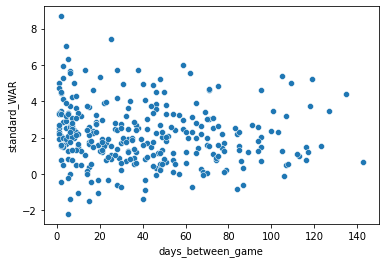

In [48]:
import seaborn as sns

sns.scatterplot(data = war_position, x = "days_between_game", y = "standard_WAR")

In [50]:
war_position.sort_values("days_between_game", ascending = False)

,Name,Team,G,PA,HR,R,RBI,SB,BB%,K%,...,xwOBA,wRC+,BsR,Off,Def,WAR,playerid,standard_WAR,name,days_between_game
272,Alek Thomas,ARI,113,411,8,45,39,4,5.4%,18.0%,...,NaN,71.0,1.8,-11.8,2.7,0.5,23792,0.663717,Alek Thomas,143.0
41,Brandon Nimmo,NYM,608,2368,63,335,213,23,13.6%,22.3%,...,NaN,134.0,4.0,103.3,-3.3,17.9,12927,4.416118,Brandon Nimmo,135.0
45,Cody Bellinger,LAD,745,2983,152,434,422,62,11.0%,23.2%,...,NaN,116.0,14.6,79.2,-3.7,17.3,15998,3.483221,Cody Bellinger,127.0
197,Jordan Luplow,- - -,323,970,45,121,120,11,11.8%,24.4%,...,NaN,102.0,-3.2,-0.4,0.3,3.3,16424,1.532508,Jordan Luplow,123.0
10,Josh Donaldson,- - -,928,3976,203,581,562,23,13.5%,21.6%,...,NaN,136.0,-6.3,167.7,18.5,32.4,5038,5.237069,Josh Donaldson,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Justin Turner,LAD,966,3898,149,522,531,27,9.5%,15.1%,...,NaN,135.0,-3.5,164.5,9.9,30.5,5235,4.736025,Justin Turner,1.0
227,Seiya Suzuki,CHC,111,446,14,54,46,9,9.4%,24.7%,...,NaN,116.0,-0.4,7.9,-3.7,2.0,30116,2.702703,Seiya Suzuki,1.0
8,Bryce Harper,- - -,1025,4419,230,703,668,91,16.4%,21.7%,...,NaN,147.0,0.9,257.6,-63.4,34.1,11579,4.990244,Bryce Harper,1.0
1,Mookie Betts,- - -,1061,4851,208,836,631,151,10.2%,13.6%,...,NaN,136.0,46.8,261.4,48.0,48.3,13611,6.828464,Mookie Betts,NaN


# Injury data

In [64]:
def get_injury_data(players):
    df_dict = []
    for player in players:
        x = requests.get(f"https://statsapi.mlb.com/api/v1/transactions?playerId={player}").json()
        for i in x["transactions"]:
            entry = {}
            entry["name"] = i["person"]["fullName"]
            entry["type"] = i["typeCode"]
            entry["date"] = i["date"]
            entry["effectiveDate"] = i.get("effectiveDate", None)
            entry["resolutionDate"] = i.get("resolutionDate", None)
            entry["description"] = i.get("description", None)
            df_dict.append(entry)
    return pd.DataFrame(df_dict)


In [76]:
all_players = position_players.id.to_list() + pitchers.id.to_list()
test = get_injury_data(all_players)

In [93]:
test["injury"] = test["description"].str.extract(r"list\.(.+)\.", expand = False).str.strip()
test = test[~test["injury"].isna()]
test["IR_length"] = test["description"].str.extract(r"on the ([0-9]*)-day", expand = False).str.strip()
test.reset_index(drop = True, inplace = True)
test.to_csv("injury_data.csv", index = False)

In [70]:
test["injury"] = test["description"].str.extract(r"list\.(.+)\.", expand = False).str.strip()
test[~test["injury"].isna()]["injury"].unique()

array(['Left abdominal strain', 'Left Achilles injury',
       'Recovering from Achilles surgery', 'Right hamstring strain',
       'Low back strain', 'Low back spasms', 'Left hip strain',
       'Right hand contusion', 'Left groin strain', 'Left knee contusion',
       'Left hamstring strain', 'Right hip impingement',
       'Right wrist inflammation', 'Right wrist surgery',
       'Left hand hamate fracture', 'Shoulder surgery', 'Concussion',
       'Left knee soreness', 'Right quad strain and knee bruise',
       'Left thumb sprain', 'Right calf strain', 'Upper back spasms',
       'Right adductor strain', 'Dislocated left shoulder',
       'Left wrist contusion', 'Left great toe tuft fracture',
       'Right wrist fracture', 'Left ankle sprain',
       'Right oblique strain', 'Sprained left thumb',
       'Left wrist inflammation', 'Strained left hamstring',
       'Right wrist inflamation', 'Right AC joint inflammation',
       'Lower back inflammation', 'Left finger disclocation'

In [37]:
x = requests.get("https://statsapi.mlb.com/api/v1/transactions?playerId=607043").json()
df_dict = []
for i in x["transactions"]:
    entry = {}
    entry["name"] = i["person"]["fullName"]
    entry["type"] = i["typeCode"]
    entry["date"] = i["date"]
    entry["effectiveDate"] = i["effectiveDate"]
    entry["resolutionDate"] = i.get("resolutionDate", None)
    entry["description"] = i["description"]
    df_dict.append(entry)

test = pd.DataFrame(df_dict)
test[test["type"] == "SC"]["description"][62]
# x

'New York Mets placed RF Brandon Nimmo on the 10-day injured list. Right hamstring strain.'

In [59]:
import re
# test["description"].apply(lambda X: re.findall(r"list\.(.+)", str(X))[0].strip())[20:40]
test["injury"] = test["description"].str.extract(r"list\.(.+)\.", expand = False).str.strip()
test[~test["injury"].isna()]

,name,type,date,effectiveDate,resolutionDate,description,injury
15,Brandon Nimmo,SC,2015-05-17,2015-05-17,2015-05-17,Binghamton Mets placed CF Brandon Nimmo on the...,Left knee strain
39,Brandon Nimmo,SC,2017-07-08,2017-07-08,2017-07-08,New York Mets placed LF Brandon Nimmo on the 1...,Partially collapsed lung
58,Brandon Nimmo,SC,2021-05-05,2021-05-03,2021-05-03,New York Mets placed RF Brandon Nimmo on the 1...,Left index finger bone bruise
62,Brandon Nimmo,SC,2021-09-04,2021-09-04,2021-09-04,New York Mets placed RF Brandon Nimmo on the 1...,Right hamstring strain


In [50]:
test["description"]

0                New York Mets signed OF Brandon Nimmo.
1                   Brandon Nimmo assigned to GCL Mets.
2     Brandon Nimmo assigned to Kingsport Mets from ...
3           OF Brandon Nimmo assigned to New York Mets.
4     Brandon Nimmo assigned to Brooklyn Cyclones fr...
                            ...                        
63    New York Mets activated RF Brandon Nimmo from ...
64    New York Mets placed RF Brandon Nimmo on the 1...
65    New York Mets activated RF Brandon Nimmo from ...
66                RF Brandon Nimmo elected free agency.
67    New York Mets signed free agent RF Brandon Nimmo.
Name: description, Length: 68, dtype: object

In [47]:
re.findall(r"list\.(.+)", 'New York Mets placed RF Brandon Nimmo on the 10-day injured list. Right hamstring strain.')

[' Right hamstring strain.']

In [ ]:
re.fi